# Analysing GRIB file

In [562]:
import pygrib # alternative: use cfgrib (see below)
import numpy as np
import pandas as pd
import cartopy
import matplotlib.pyplot as plt

In [563]:
#grbs = pygrib.open('test.grb')
#grbs = pygrib.open('surface.grb')
grbs = pygrib.open('surface_singlelevel.grb')

In [579]:
for grb in grbs:
    timestr="{}-{:02d}-{:02d} {:02d}:{:02}".format(
        grb.year,grb.month,grb.day,grb.hour,grb.minute)
    print(timestr)
grbs.seek(0)
grb = grbs.select()[0]

2009-12-31 18:00
2009-12-31 18:00
2009-12-31 18:00
2009-12-31 18:00
2009-12-31 18:00
2009-12-31 18:00
2009-12-31 18:00
2009-12-31 18:00
2009-12-31 18:00
2009-12-31 18:00
2010-01-31 18:00
2010-01-31 18:00
2010-01-31 18:00
2010-01-31 18:00
2010-01-31 18:00
2010-01-31 18:00
2010-01-31 18:00
2010-01-31 18:00
2010-01-31 18:00
2010-01-31 18:00
2010-02-28 18:00
2010-02-28 18:00
2010-02-28 18:00
2010-02-28 18:00
2010-02-28 18:00
2010-02-28 18:00
2010-02-28 18:00
2010-02-28 18:00
2010-02-28 18:00
2010-02-28 18:00
2010-03-31 18:00
2010-03-31 18:00
2010-03-31 18:00
2010-03-31 18:00
2010-03-31 18:00
2010-03-31 18:00
2010-03-31 18:00
2010-03-31 18:00
2010-03-31 18:00
2010-03-31 18:00
2010-04-30 18:00
2010-04-30 18:00
2010-04-30 18:00
2010-04-30 18:00
2010-04-30 18:00
2010-04-30 18:00
2010-04-30 18:00
2010-04-30 18:00
2010-04-30 18:00
2010-04-30 18:00
2010-05-31 18:00
2010-05-31 18:00
2010-05-31 18:00
2010-05-31 18:00
2010-05-31 18:00
2010-05-31 18:00
2010-05-31 18:00
2010-05-31 18:00
2010-05-31 18:

In [578]:
timestr="{}-{:02d}-{:02d} {:02d}:{:02}".format(
    grb.year,grb.month,grb.day,grb.hour,grb.minute)

In [565]:
print(grb)
print(grbs.select()[-1])

1:Surface solar radiation downwards:J m**-2 (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 200912311800
2568:Surface solar radiation downwards:J m**-2 (avgas):regular_ll:surface:level 0:fcst time 4-5 hrs (avgas):from 201812011800


1:Surface solar radiation downwards:J m**-2 (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 200912311800

In [566]:
# Alt 1:
df = pd.DataFrame(np.reshape(grb['latLonValues'],(3,-1),order='F')).T
df.columns = ['lat','lon','value']
#df=df.set_index(['lat','lon']) # change to matrix, for contour plotting
# Alt 2:
df2=pd.DataFrame()
df2['lat'] = grb['latitudes']
df2['lon'] = grb['longitudes']
df2['value'] = grb.values.ravel()
#df2=df2.set_index(['lat','lon']) # change to matrix, for contour plotting
# Alt 3:
df3=pd.DataFrame(index=grb['distinctLatitudes'],
                 columns=grb['distinctLongitudes'],
                 data=grb.values)
#df3=df3.stack().reset_index().head() # change to long array (3 columns)
#df3.columns=['lat','lon','value']

In [567]:
df.head()

,lat,lon,value
0,70.0,-10.0,18432.0
1,70.0,-9.5,19456.0
2,70.0,-9.0,20480.0
3,70.0,-8.5,20480.0
4,70.0,-8.0,21504.0


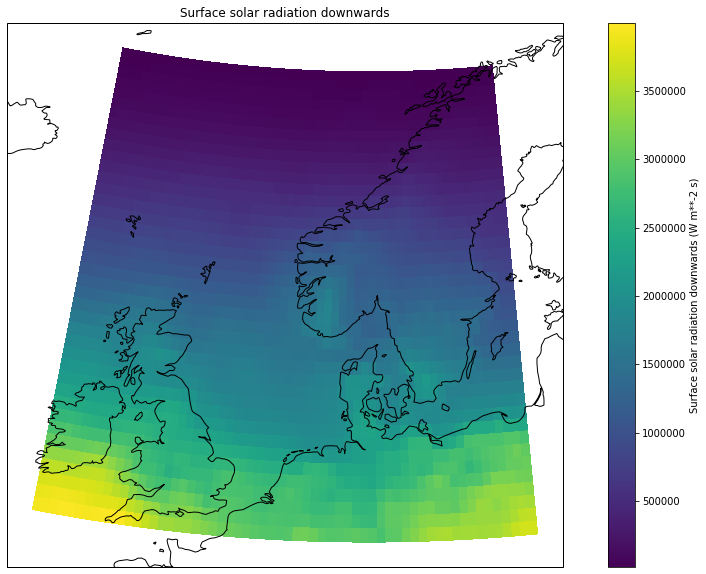

In [568]:
plt.figure(figsize=(16,10))
#proj=cartopy.crs.Mercator(central_longitude=5)
#proj=cartopy.crs.LambertAzimuthalEqualArea(central_longitude=10,central_latitude=60)
proj=cartopy.crs.AlbersEqualArea(central_longitude=10,central_latitude=60)
#proj=cartopy.crs.PlateCarree()
ax = plt.subplot(111, projection=proj)
#mm = ax.pcolormesh(grb['distinctLongitudes'],grb['distinctLatitudes'],
#                   grb.values,transform=cartopy.crs.PlateCarree())
mm = ax.pcolormesh(df3.columns,df3.index,df3,transform=cartopy.crs.PlateCarree())
#ax.scatter(df['lon'],df['lat'],s=1,c=df['value'],zorder=3,transform=cartopy.crs.PlateCarree())
cbar=plt.colorbar(mm,ax=ax,label="{} ({})".format(grb.parameterName,grb.parameterUnits))
#ax.contourf(grb['distinctLongitudes'],grb['distinctLatitudes'],grb.values,60)
ax.coastlines(resolution='50m')
#ax.gridlines(draw_labels=False)
plt.title(grb.parameterName)
plt.show()

In [560]:
for k in grb.keys():
    print("{}: {}".format(k, getattr(grb,k)))

globalDomain: g
GRIBEditionNumber: 1
eps: 0
offsetSection0: 0
section0Length: 8
totalLength: 5114
editionNumber: 1
WMO: 0
productionStatusOfProcessedData: 0
section1Length: 56
wrongPadding: 0
table2Version: 128
centre: ecmf
centreDescription: European Centre for Medium-Range Weather Forecasts
generatingProcessIdentifier: 145
gridDefinition: 255
indicatorOfParameter: 169
parameterName: Surface solar radiation downwards
parameterUnits: W m**-2 s
indicatorOfTypeOfLevel: sfc
pressureUnits: hPa
typeOfLevelECMF: surface
typeOfLevel: surface
level: 0
yearOfCentury: 9
month: 12
day: 31
hour: 18
minute: 0
second: 0
unitOfTimeRange: 1
P1: 0
P2: 12
timeRangeIndicator: 130
numberIncludedInAverage: 248
numberMissingFromAveragesOrAccumulations: 0
centuryOfReferenceTimeOfData: 21
subCentre: 0
paramIdECMF: 169
paramId: 169
cfNameECMF: surface_downwelling_shortwave_flux_in_air
cfName: surface_downwelling_shortwave_flux_in_air
cfVarNameECMF: ssrd
cfVarName: ssrd
unitsECMF: J m**-2
units: J m**-2
nameECM

# GRIB format with cfgrib

In [1]:
import xarray as xr

In [69]:
#ds = xr.open_dataset('surface_singlelevel.grb', engine='cfgrib')
ds = xr.open_dataset('surface.grb', engine='cfgrib')

2020-04-29 08:58:29,388 INFO missing from GRIB stream: 'directionNumber'
2020-04-29 08:58:29,389 INFO missing from GRIB stream: 'frequencyNumber'
2020-04-29 08:58:29,406 INFO missing from GRIB stream: 'directionNumber'
2020-04-29 08:58:29,407 INFO missing from GRIB stream: 'frequencyNumber'
2020-04-29 08:58:29,434 INFO missing from GRIB stream: 'directionNumber'
2020-04-29 08:58:29,435 INFO missing from GRIB stream: 'frequencyNumber'
2020-04-29 08:58:29,459 INFO missing from GRIB stream: 'directionNumber'
2020-04-29 08:58:29,460 INFO missing from GRIB stream: 'frequencyNumber'


In [61]:
#ds
#ds.step.values/(3600*1e9)
#ds.t2m.isel(step=1).values

In [64]:
ssrd_0=ds.ssrd.isel(step=0)
t_date=ds.time.values
t_hours=ds.step.values/(3600*1e9)
@widgets.interact
def show_rad(hour=(t_hours[0],t_hours[-1],1)):
    step=hour-t_hours[0]
    ssrd_1=(ds.ssrd.isel(step=step)-ssrd_0)/3600
    #ssrd_1=ds.t2m.isel(step=step)-273.15 #K to C
    #ssrd_1=ds.v10.isel(step=step)
    ssrd_1.plot(figsize=(12,10))

interactive(children=(IntSlider(value=16, description='hour', max=18, min=14), Output()), _dom_classes=('widge…

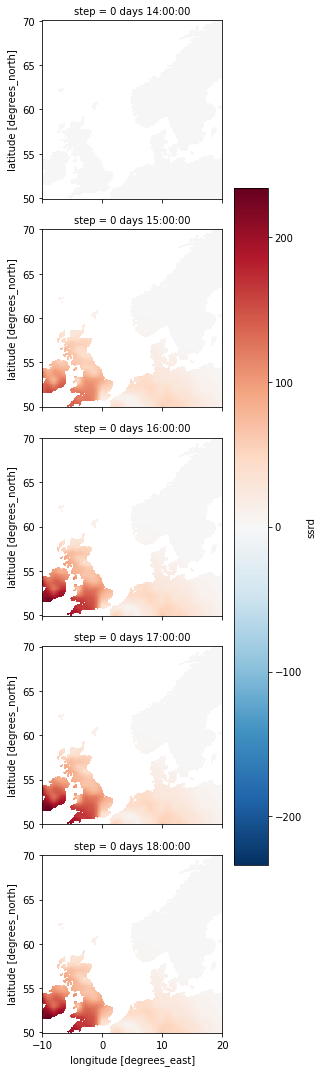

In [68]:
ssrd_t=(ds.ssrd-ssrd_0)/3600
ssrd_t.plot(x='longitude',y='latitude',row='step')

# NetCDF format

In [24]:
import netCDF4
import ipywidgets as widgets
#from ipywidgets import interact, interact_manual

In [583]:
nc_rad = netCDF4.Dataset('test2.nc')

In [584]:
# longitude, latitude, time, ssrd
times=nc_rad.variables['time']
jd = netCDF4.num2date(times[:],times.units)
lats = nc_rad.variables['latitude'][:]
lons = nc_rad.variables['longitude'][:]
ssrd = nc_rad.variables['ssrd']

In [590]:
nc_rad.variables

OrderedDict([('longitude',
              <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (81,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude',
              <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (81,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time',
              <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: hours since 1900-01-01 00:00:00.0
                  long_name: time
                  calendar: gregorian
              unlimited dimensions: 
              current shape = (24,)
  

In [586]:
print(ssrd[:].shape, jd.shape,lats.shape,lons.shape)

df4s={}
rad0=pd.DataFrame(ssrd[0,:,:],index=lats,columns=lons)
for t in range(1,jd.shape[0]):
    delta_t = (jd[t]-jd[t-1]).seconds
    df4s[t]=(pd.DataFrame(ssrd[t,:,:],index=lats,columns=lons)
             -pd.DataFrame(ssrd[t-1,:,:],index=lats,columns=lons))/delta_t

(24, 81, 81) (24,) (81,) (81,)


In [587]:
#arr=np.reshape(ssrd[:]
#df4 = pd.DataFrame(data=ssrd[:])
#df4['lat'] = lats
#df4['lons'] = lons
#df4.set_index

In [595]:
df4s[12].head()

,-5.00,-4.75,-4.50,-4.25,-4.00,-3.75,-3.50,-3.25,-3.00,-2.75,...,12.75,13.00,13.25,13.50,13.75,14.00,14.25,14.50,14.75,15.00
70.00,5.883742,5.724947,5.566153,6.502203,7.647193,9.210061,15.453179,19.389603,22.540413,25.616006,...,-7.145737,-6.702785,-5.942245,-5.047983,-3.058877,-1.011268,1.086486,3.142453,4.696964,6.042536
69.75,1.972391,1.855384,2.808149,5.223492,6.828149,8.391018,14.717711,21.036048,27.128729,32.853676,...,-10.171184,-9.686444,-9.226777,-10.187899,-9.669729,-7.555259,-5.440789,-3.359750,-1.245281,1.387360
69.50,5.256923,6.309979,7.363035,9.878668,12.385945,15.361246,20.659956,26.827856,32.953967,38.720703,...,-8.783824,-10.864864,-11.934635,-13.012764,-12.603242,-12.210435,-12.803824,-9.887026,-7.204240,-4.513097
69.25,9.744947,12.143575,14.751142,18.219541,21.545860,24.888895,29.652720,34.416545,38.762491,41.971804,...,-5.691517,-8.482951,-11.257670,-14.349978,-15.628689,-16.940830,-18.236256,-15.077088,-11.942992,-8.675176
69.00,15.695549,19.080372,22.448480,26.259540,30.062242,33.814799,37.124403,40.308644,43.467812,44.955463,...,-2.457131,-6.351766,-10.329978,-14.308190,-15.520040,-16.690102,-17.901952,-14.383408,-10.848148,-7.287816


In [589]:
@interact
def show_rad(hour=(1,len(df4s),1)):
    df4=df4s[hour]
    plt.figure(figsize=(16,10))
    proj=cartopy.crs.AlbersEqualArea(central_longitude=10,central_latitude=60)
    ax = plt.subplot(111, projection=proj)
    mm = ax.pcolormesh(df4.columns,df4.index,df4,vmin=0,vmax=1200,
                       transform=cartopy.crs.PlateCarree())
    cbar=plt.colorbar(mm,ax=ax)
    ax.coastlines(resolution='50m')
    #ax.gridlines(draw_labels=False)
    plt.title("{} ({})".format(ssrd.long_name,jd[hour]))
    plt.show()

interactive(children=(IntSlider(value=12, description='hour', max=23, min=1), Output()), _dom_classes=('widget…

In [591]:
delta_t/3600

1.0